In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange


# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger
# import randomPubsInit

/Users/fredriktsitje/Developer/Master/PubCrawl/PubCrawl 2/Logger.py:6: UserWarning: loadtxt: input contained no data: "Logs/counter.txt"
  logFileName = folder + "BestPath_" + str(np.loadtxt(counter, dtype=int)) + ".csv"
/Users/fredriktsitje/Developer/Master/PubCrawl/PubCrawl 2/Logger.py:8: UserWarning: loadtxt: input contained no data: "Logs/counter.txt"
  np.savetxt(counter, [np.loadtxt(counter, dtype=int)+1], fmt='%i')


In [2]:
# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min

# load the pubs
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
for pub in Pubs:
    pub.popularity *= 30

In [3]:
# sum all popularities
sumPopularity = 0
for p in Pubs:
    sumPopularity += p.popularity

print('Sum of all popularities: ', sumPopularity)

Sum of all popularities:  39150


Text(0, 0.5, 'Pub ID')

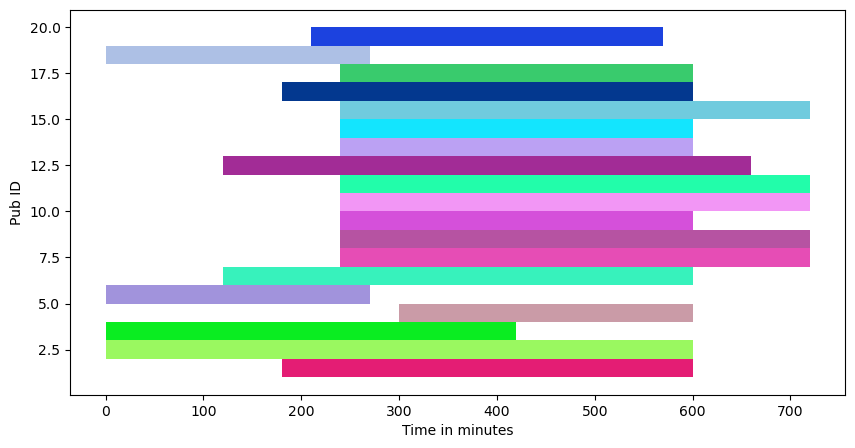

In [4]:
# create a plot where the opening hours and closing hours of the pubs are shown
# in vertical direction plot all the pubs
# in horizontal direction plot the time

# time is in minutes, the opening times are shown as recatangles

fig, ax = plt.subplots(figsize=(10, 5))

for p in Pubs:
    # use different color for each pub
    color = np.random.rand(3,)
    # plot the opening times
    ax.broken_barh([(p.openingTime, p.closingTime - p.openingTime)], (p.pubID, 1), facecolors=color)
    # place a text with the pubName

# label the bars on the y-axis with their name which comes as a string pubName

plt.xlabel('Time in minutes')
plt.ylabel('Pub ID')



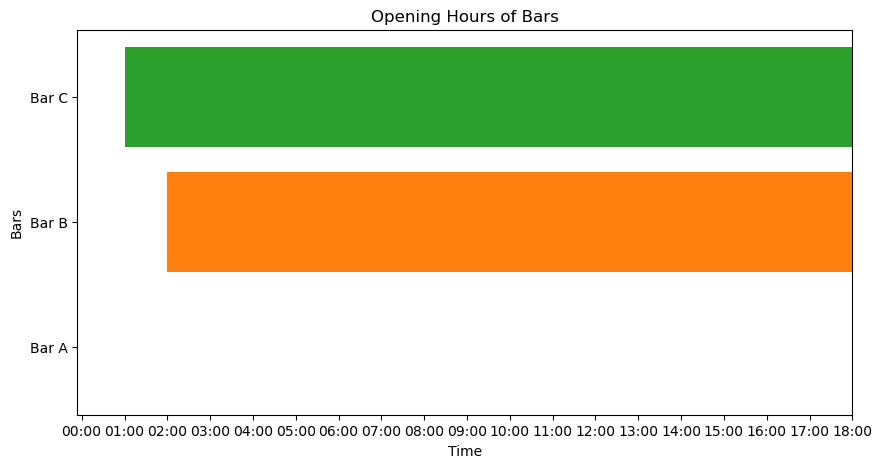

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data: Bar names, opening times, and closing times
bar_data = [
    {"name": "Bar A", "open": "18:00", "close": "23:00"},
    {"name": "Bar B", "open": "20:00", "close": "02:00"},
    {"name": "Bar C", "open": "19:30", "close": "01:00"},
    # Add more bars as needed
]

# Convert opening and closing times to datetime objects
for bar in bar_data:
    bar["open"] = datetime.strptime(bar["open"], "%H:%M")
    bar["close"] = datetime.strptime(bar["close"], "%H:%M")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot rectangles for each bar's opening hours
for bar in bar_data:
    ax.barh(bar["name"], width=bar["close"] - bar["open"], left=bar["open"])

# Format x-axis as time
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Bars')
plt.title('Opening Hours of Bars')

# Show the plot
plt.show()
